In [ ]:
import pandas as pd 
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


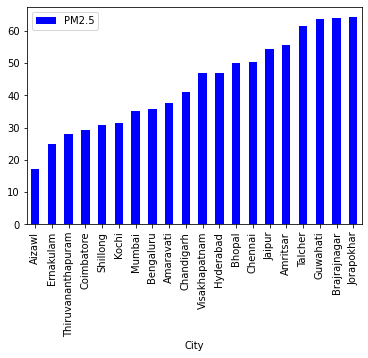

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
19032,Kolkata,2018-04-10,34.38,57.00,NaN,40.97,NaN,2.52,1.00,25.46,NaN,NaN,NaN,NaN,NaN,NaN
19033,Kolkata,2018-04-11,29.00,50.87,3.26,34.03,45.29,3.59,0.98,10.32,30.99,4.64,0.88,NaN,73.0,Satisfactory
19034,Kolkata,2018-04-12,21.70,43.04,3.49,39.49,42.54,3.77,0.73,NaN,43.72,5.33,1.76,NaN,60.0,Satisfactory
19035,Kolkata,2018-04-13,23.09,46.49,3.69,33.03,36.72,3.88,0.98,NaN,41.65,6.78,2.23,NaN,74.0,Satisfactory
19036,Kolkata,2018-04-14,21.56,42.10,2.81,26.62,29.43,4.22,1.00,NaN,44.07,5.09,2.33,NaN,83.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19841,Kolkata,2020-06-27,7.89,24.73,5.24,9.25,14.52,8.39,0.35,5.73,23.14,1.68,11.31,0.24,37.0,Good
19842,Kolkata,2020-06-28,10.58,25.56,5.94,12.63,18.62,6.92,0.38,5.92,27.76,1.32,11.07,0.34,43.0,Good
19843,Kolkata,2020-06-29,14.53,32.40,5.42,15.98,21.45,7.59,0.45,7.01,30.64,3.18,9.78,0.34,48.0,Good
19844,Kolkata,2020-06-30,14.00,35.85,6.25,12.29,18.12,9.64,0.37,5.66,24.59,2.46,10.75,0.27,47.0,Good


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/city_day.csv')

data[['PM2.5','City']].groupby(["City"]).mean().sort_values(by='PM2.5').head(20).plot.bar(color='b')
plt.show() 
Kolkata = data[data['City']=='Kolkata']
Kolkata

In [ ]:
for column in Kolkata[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Kolkata[column].isna().sum()
    print((count/814)*100)

PM2.5
6.756756756756757
NO
3.194103194103194
NO2
3.0712530712530715
NOx
0.12285012285012285
NH3
0.0
CO
0.0
SO2
7.616707616707617
O3
6.142506142506143
Benzene
0.12285012285012285
Toluene
0.12285012285012285
Xylene
51.5970515970516


In [ ]:
Kolkata = Kolkata.drop(columns = ['Xylene'])

In [ ]:
for column in Kolkata[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene']]:
  colMean = Kolkata[column].mean(skipna = True)
  Kolkata[column].fillna(colMean)

In [ ]:
Kolkata['AQI_Bucket'].value_counts()

Satisfactory    285
Moderate        152
Poor            119
Good            119
Very Poor        66
Severe           13
Name: AQI_Bucket, dtype: int64

In [ ]:
Kolkata['AQI_Bucket'].fillna("Satisfactory", inplace = True)

In [ ]:
Kolkata['Date'] = pd.to_datetime(Kolkata['Date'])

In [ ]:
Kolkata['City'] = Kolkata['City'].str.lower()
Kolkata['AQI_Bucket'] = Kolkata['AQI_Bucket'].str.lower()

In [ ]:
Kolkata['month'] = pd.DatetimeIndex(Kolkata['Date']).month
Kolkata['year'] = pd.DatetimeIndex(Kolkata['Date']).year
Kolkata.head()
Kolkata

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,month,year
19032,kolkata,2018-04-10,34.38,57.00,NaN,40.97,NaN,2.52,1.00,25.46,NaN,NaN,NaN,NaN,satisfactory,4,2018
19033,kolkata,2018-04-11,29.00,50.87,3.26,34.03,45.29,3.59,0.98,10.32,30.99,4.64,0.88,73.0,satisfactory,4,2018
19034,kolkata,2018-04-12,21.70,43.04,3.49,39.49,42.54,3.77,0.73,NaN,43.72,5.33,1.76,60.0,satisfactory,4,2018
19035,kolkata,2018-04-13,23.09,46.49,3.69,33.03,36.72,3.88,0.98,NaN,41.65,6.78,2.23,74.0,satisfactory,4,2018
19036,kolkata,2018-04-14,21.56,42.10,2.81,26.62,29.43,4.22,1.00,NaN,44.07,5.09,2.33,83.0,satisfactory,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19841,kolkata,2020-06-27,7.89,24.73,5.24,9.25,14.52,8.39,0.35,5.73,23.14,1.68,11.31,37.0,good,6,2020
19842,kolkata,2020-06-28,10.58,25.56,5.94,12.63,18.62,6.92,0.38,5.92,27.76,1.32,11.07,43.0,good,6,2020
19843,kolkata,2020-06-29,14.53,32.40,5.42,15.98,21.45,7.59,0.45,7.01,30.64,3.18,9.78,48.0,good,6,2020
19844,kolkata,2020-06-30,14.00,35.85,6.25,12.29,18.12,9.64,0.37,5.66,24.59,2.46,10.75,47.0,good,6,2020


In [ ]:
Kolkata = Kolkata[Kolkata['year']>=2017]
#Kolkata[Kolkata['year'] == 2020] 

[Text(0.5, 0, 'PM2.5'),
 Text(1.5, 0, 'PM10'),
 Text(2.5, 0, 'NO'),
 Text(3.5, 0, 'NO2'),
 Text(4.5, 0, 'NOx'),
 Text(5.5, 0, 'NH3'),
 Text(6.5, 0, 'CO'),
 Text(7.5, 0, 'SO2'),
 Text(8.5, 0, 'O3'),
 Text(9.5, 0, 'Benzene'),
 Text(10.5, 0, 'Toluene'),
 Text(11.5, 0, 'AQI')]

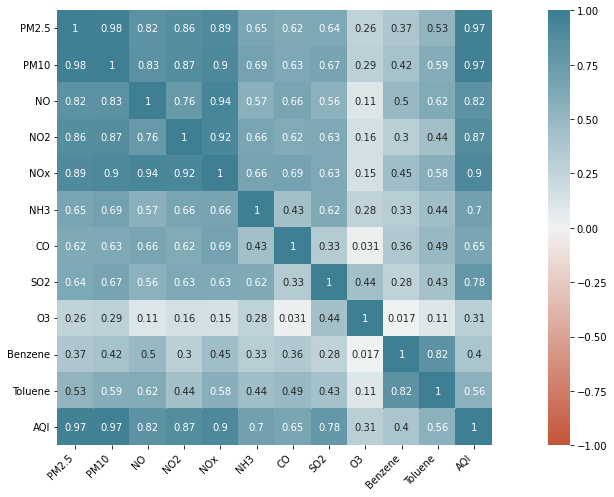

In [ ]:
df_corr = Kolkata.corr()
df_corr = df_corr.drop(['year','month'],axis = 1)
df_corr = df_corr.drop(['year','month'],axis = 0)
plt.figure(figsize=(20,8))
ax = sns.heatmap( df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


[Text(0.5, 0, 'PM2.5'),
 Text(1.5, 0, 'PM10'),
 Text(2.5, 0, 'NO'),
 Text(3.5, 0, 'NO2'),
 Text(4.5, 0, 'NOx'),
 Text(5.5, 0, 'NH3'),
 Text(6.5, 0, 'CO'),
 Text(7.5, 0, 'SO2'),
 Text(8.5, 0, 'O3'),
 Text(9.5, 0, 'Benzene'),
 Text(10.5, 0, 'Toluene'),
 Text(11.5, 0, 'AQI')]

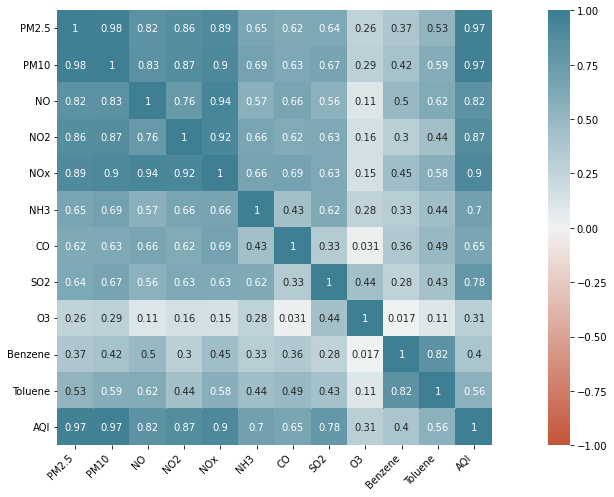

In [ ]:
df_corr = Kolkata.corr()
df_corr = df_corr.drop(['year','month'],axis = 1)
df_corr = df_corr.drop(['year','month'],axis = 0)
plt.figure(figsize=(20,8))
ax = sns.heatmap( df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


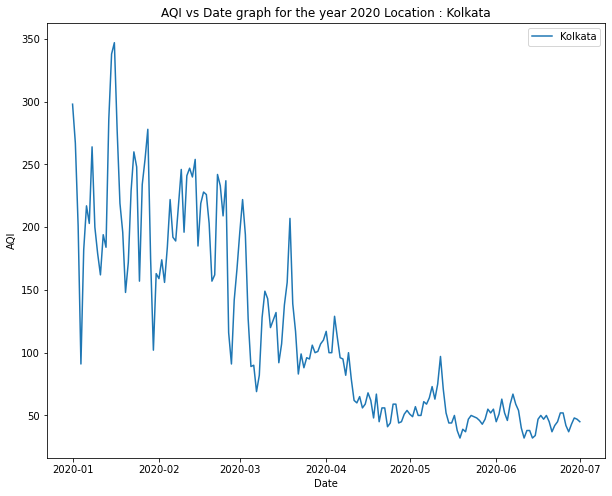

In [ ]:
kolkata_2020 = Kolkata[Kolkata['year'] == 2020] 
kolkata_2020
plt.figure(figsize=(10,8))
plt.plot(kolkata_2020['Date'],kolkata_2020['AQI'])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI vs Date graph for the year 2020 Location : Kolkata")
plt.legend(["Kolkata"])

[]

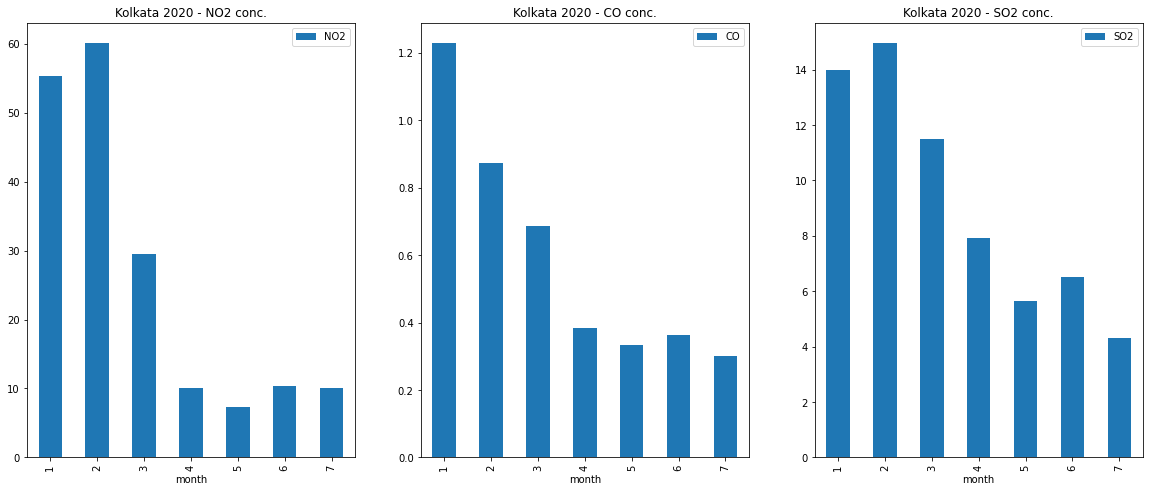

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,8))
ax1.title.set_text("Kolkata 2020 - NO2 conc.")
kolkata_2020.groupby(kolkata_2020['month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax1)
ax2.title.set_text("Kolkata 2020 - CO conc.")
kolkata_2020.groupby(kolkata_2020['month']).mean().plot(y = ['CO'],kind = 'bar',ax = ax2)
ax3.title.set_text("Kolkata 2020 - SO2 conc.")
kolkata_2020.groupby(kolkata_2020['month']).mean().plot(y = ['SO2'],kind = 'bar',ax = ax3)

plt.plot()

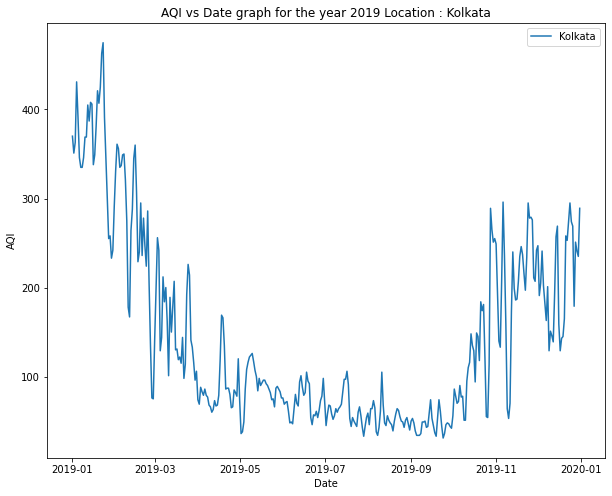

In [ ]:
kolkata_2019 = Kolkata[Kolkata['year'] == 2019] 
kolkata_2019
plt.figure(figsize=(10,8))
plt.plot(kolkata_2019['Date'],kolkata_2019['AQI'])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI vs Date graph for the year 2019 Location : Kolkata")
plt.legend(["Kolkata"])

[]

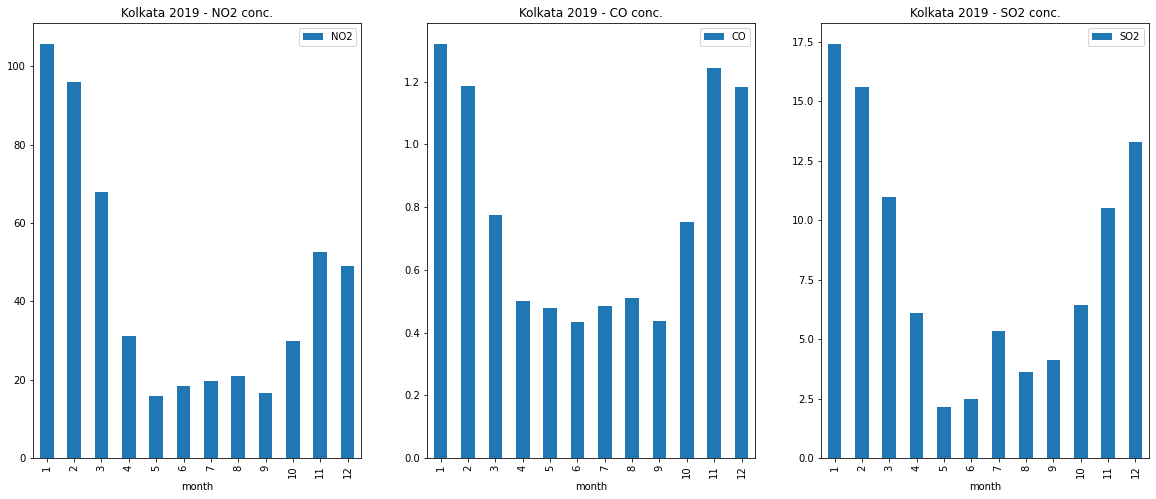

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,8))
ax1.title.set_text("Kolkata 2019 - NO2 conc.")
kolkata_2019.groupby(kolkata_2019['month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax1)
ax2.title.set_text("Kolkata 2019 - CO conc.")
kolkata_2019.groupby(kolkata_2019['month']).mean().plot(y = ['CO'],kind = 'bar',ax = ax2)
ax3.title.set_text("Kolkata 2019 - SO2 conc.")
kolkata_2019.groupby(kolkata_2019['month']).mean().plot(y = ['SO2'],kind = 'bar',ax = ax3)

plt.plot()

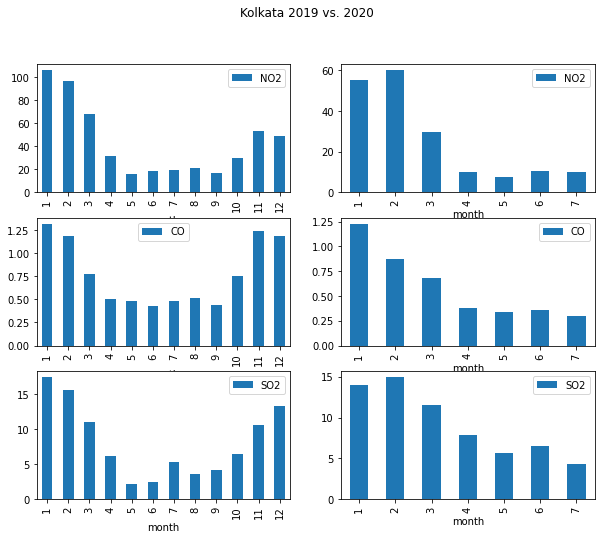

In [ ]:
fig,ax = plt.subplots(3,2,figsize = (10,8))
fig.suptitle("Kolkata 2019 vs. 2020")
kolkata_2019.groupby(kolkata_2019['month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax[0,0])
kolkata_2020.groupby(kolkata_2020['month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax[0,1])
kolkata_2019.groupby(kolkata_2019['month']).mean().plot(y = ['CO'],kind = 'bar',ax =ax[1,0])
kolkata_2020.groupby(kolkata_2020['month']).mean().plot(y = ['CO'],kind = 'bar',ax =ax[1,1])
kolkata_2019.groupby(kolkata_2019['month']).mean().plot(y = ['SO2'],kind = 'bar',ax =ax[2,0])
kolkata_2020.groupby(kolkata_2020['month']).mean().plot(y = ['SO2'],kind = 'bar',ax =ax[2,1])